# Steel Plates fault diagnosis using Machine Learning Models

## Objective:

   The objective of the project is to classify steel plates fault into 7 different types. The end goal is to train several machine Learning Algorithms for automatic pattern recognition. In doing so, we have employed **Logistic Regression**, **KNN**, **Naïve Bayes**, **Decision Trees** and **Random Forest**. Also, we have used **_Cross-validation_** to find the most optimum hyper-parameters. Finally, we compare the models and see  how well each model perform using Classification metrics: Confusion Matrix, Precision, Recall and F-1 Score.

## Motivation:

    A fault may be defined as an unacceptable difference of at least one characteristic property or attribute of a system from acceptable usual typical performance. The main purpose of any fault diagnosis system is to determine the location and occurrence time of possible faults on the basis of accessible data and knowledge about the performance of diagnosed processes. Manual fault diagnosis system is the traditional way where an expert with electronic meter tries to obtain some information about relevant operational equipment, check the maintenance manual and then diagnosed the probable causes of a particular fault.  However, intelligent fault diagnosis techniques can provide quick and correct systems that help to keep away from product quality problems and facilitates precautionary maintenance.
    This project evaluates the performances of several popular and effective data mining models to diagnose seven commonly occurring faults of the steel plate namely; Pastry, Z_Scratch, K_Scatch, Stains, Dirtiness, Bumps and Other_Faults.
 

## Data Collection:

URL : [http://archive.ics.uci.edu/ml/datasets/steel%2Bplates%2Bfaults]

### Source:

> Semeion, Research Center of Sciences of Communication, Via Sersale 117, 00128, Rome, Italy. 
www.semeion.it

### References:

>> M Buscema, S Terzi, W Tastle, A New Meta-Classifier,in NAFIPS 2010, Toronto (CANADA),26-28 July 2010, 978-1-4244-7858-6/10 Â©2010 IEEE

>> M Buscema, MetaNet: The Theory of Independent Judges, in Substance Use & Misuse, 33(2), 439-461,1998

## Workflow :

   1. **Exploratory Data Analysis**
       - 1.1 Count Plot to show the number of defects belonging to each defect type.
       - 1.2 Visual analysis of the correlation between the factors.
       - 1.3 Correlation Matrix    
       
   2. **Model Development and Classification**
        - 2.1 Data Preparation
        - 2.2 Model Development
            - 2.2.1 Logistic Regression
            - 2.2.2 KNN
            - 2.2.3 Naïve Bayes
            - 2.2.4 Decision Trees
            - 2.2.5 Random Forest
   
## Results:

   1. EDA helps in giving a preliminary glimpse on how various factors are affecting the development of Defects.
       - We notice that 'other defects', 'bumps' and 'K_Scratch' are major defects.
   2. Cross-Validation is an effective way to find the best Hyper-parameters.
   3. KNN outperforms other models.
   

|    Model     |    Classification Accuracy    | Classification Error   |
 |:------------:|:-----------------------------:|:----------------------:|
 | Logistic Regression| 68.12 |31.88|
 | KNN | 71.465 |28.535|
 | Naïve Bayes | 35.48 |64.52|
 | Decision Trees | 62.468 |37.53|
 | Random Forest | 62.98 |37.02|

## Conclusion:

    Several Classification techniques fair pretty well in predicting the defect-type.  Although data mining techniques are capable of extracting patterns and relationships hidden deep into large datasets, without the cooperation and feedback from the experts and professional, their results are useless. The patterns found via data mining techniques should be evaluated by professionals who have years of experience in Predicting steel plates faults. 
    
#### By 
**A K RAJAMANNAR**

In [1]:
## Classification Algorithms
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

import pandas as pd


# importing ploting libraries
import matplotlib.pyplot as plt   

#importing seaborn for statistical plots
import seaborn as sns

#Let us break the X and y dataframes into training set and test set. For this we will use
#Sklearn package's data splitting function which is based on random function

from sklearn.cross_validation import train_test_split
from scipy.stats import zscore

import numpy as np

# calculate accuracy measures and confusion matrix
from sklearn import metrics
# To enable plotting graphs in Jupyter notebook
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import confusion_matrix
%matplotlib inline 

C:\Users\IQbal\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\IQbal\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [30]:
names = ['X_Minimum', 'X_Maximum', 'Y_Minimum', 'Y_Maximum', 'Pixels_Areas', 'X_Perimeter', 'Y_Perimeter', 'Sum_of_Luminosity', 'Minimum_of_Luminosity', 'Maximum_of_Luminosity', 'Length_of_Conveyer', 'TypeOfSteel_A300', 'TypeOfSteel_A400', 'Steel_Plate_Thickness', 'Edges_Index', 'Empty_Index', 'Square_Index', 'Outside_X_Index', 'Edges_X_Index', 'Edges_Y_Index', 'Outside_Global_Index', 'LogOfAreas', 'Log_X_Index', 'Log_Y_Index', 'Orientation_Index', 'Luminosity_Index', 'SigmoidOfAreas', 'Pastry', 'Z_Scratch', 'K_Scatch', 'Stains', 'Dirtiness', 'Bumps', 'Other_Faults']

In [31]:
df = pd.read_csv("steel.txt", sep = '\t', header=None, names = names)

In [32]:
from xlsxwriter.utility import xl_rowcol_to_cell
conditions=[(df['Pastry'] == 1) & (df['Z_Scratch'] == 0)& (df['K_Scatch'] == 0)& (df['Stains'] == 0)& (df['Dirtiness'] == 0)& (df['Bumps'] == 0)& (df['Other_Faults'] == 0), (df['Pastry'] == 0) & (df['Z_Scratch'] == 1)& (df['K_Scatch'] == 0)& (df['Stains'] == 0)& (df['Dirtiness'] == 0)& (df['Bumps'] == 0)& (df['Other_Faults'] == 0),(df['Pastry'] == 0) & (df['Z_Scratch'] == 0)& (df['K_Scatch'] == 1)& (df['Stains'] == 0)& (df['Dirtiness'] == 0)& (df['Bumps'] == 0)& (df['Other_Faults'] == 0),(df['Pastry'] == 0) & (df['Z_Scratch'] == 0)& (df['K_Scatch'] == 0)& (df['Stains'] == 1)& (df['Dirtiness'] == 0)& (df['Bumps'] == 0)& (df['Other_Faults'] == 0),(df['Pastry'] == 0) & (df['Z_Scratch'] == 0)& (df['K_Scatch'] == 0)& (df['Stains'] == 0)& (df['Dirtiness'] == 1)& (df['Bumps'] == 0)& (df['Other_Faults'] == 0),(df['Pastry'] == 0) & (df['Z_Scratch'] == 0)& (df['K_Scatch'] == 0)& (df['Stains'] == 0)& (df['Dirtiness'] == 0)& (df['Bumps'] == 1)& (df['Other_Faults'] == 0),(df['Pastry'] == 0) & (df['Z_Scratch'] == 0)& (df['K_Scatch'] == 0)& (df['Stains'] == 0)& (df['Dirtiness'] == 0)& (df['Bumps'] == 0)& (df['Other_Faults'] == 1)]
choices = ['Pastry', 'Z_Scratch', 'K_Scatch', 'Stains', 'Dirtiness', 'Bumps', 'Other_Faults']
df['class'] = np.select(conditions, choices)

drp_cols=['TypeOfSteel_A400','Pastry', 'Z_Scratch', 'K_Scatch', 'Stains', 'Dirtiness', 'Bumps', 'Other_Faults']
df.drop(choices, inplace=True,axis = 1)
df.head()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,class
0,42,50,270900,270944,267,17,44,24220,76,108,...,0.4706,1.0000,1.0,2.4265,0.9031,1.6435,0.8182,-0.2913,0.5822,Pastry
1,645,651,2538079,2538108,108,10,30,11397,84,123,...,0.6000,0.9667,1.0,2.0334,0.7782,1.4624,0.7931,-0.1756,0.2984,Pastry
2,829,835,1553913,1553931,71,8,19,7972,99,125,...,0.7500,0.9474,1.0,1.8513,0.7782,1.2553,0.6667,-0.1228,0.2150,Pastry
3,853,860,369370,369415,176,13,45,18996,99,126,...,0.5385,1.0000,1.0,2.2455,0.8451,1.6532,0.8444,-0.1568,0.5212,Pastry
4,1289,1306,498078,498335,2409,60,260,246930,37,126,...,0.2833,0.9885,1.0,3.3818,1.2305,2.4099,0.9338,-0.1992,1.0000,Pastry


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1941 entries, 0 to 1940
Data columns (total 28 columns):
X_Minimum                1941 non-null int64
X_Maximum                1941 non-null int64
Y_Minimum                1941 non-null int64
Y_Maximum                1941 non-null int64
Pixels_Areas             1941 non-null int64
X_Perimeter              1941 non-null int64
Y_Perimeter              1941 non-null int64
Sum_of_Luminosity        1941 non-null int64
Minimum_of_Luminosity    1941 non-null int64
Maximum_of_Luminosity    1941 non-null int64
Length_of_Conveyer       1941 non-null int64
TypeOfSteel_A300         1941 non-null int64
TypeOfSteel_A400         1941 non-null int64
Steel_Plate_Thickness    1941 non-null int64
Edges_Index              1941 non-null float64
Empty_Index              1941 non-null float64
Square_Index             1941 non-null float64
Outside_X_Index          1941 non-null float64
Edges_X_Index            1941 non-null float64
Edges_Y_Index            194

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
X_Minimum,1941.0,5.711360e+02,5.206907e+02,0.0000,51.0000,4.350000e+02,1.053000e+03,1.705000e+03
X_Maximum,1941.0,6.179645e+02,4.976274e+02,4.0000,192.0000,4.670000e+02,1.072000e+03,1.713000e+03
Y_Minimum,1941.0,1.650685e+06,1.774578e+06,6712.0000,471253.0000,1.204128e+06,2.183073e+06,1.298766e+07
Y_Maximum,1941.0,1.650739e+06,1.774590e+06,6724.0000,471281.0000,1.204136e+06,2.183084e+06,1.298769e+07
Pixels_Areas,1941.0,1.893878e+03,5.168460e+03,2.0000,84.0000,1.740000e+02,8.220000e+02,1.526550e+05
X_Perimeter,1941.0,1.118552e+02,3.012092e+02,2.0000,15.0000,2.600000e+01,8.400000e+01,1.044900e+04
Y_Perimeter,1941.0,8.296600e+01,4.264829e+02,1.0000,13.0000,2.500000e+01,8.300000e+01,1.815200e+04
Sum_of_Luminosity,1941.0,2.063121e+05,5.122936e+05,250.0000,9522.0000,1.920200e+04,8.301100e+04,1.159141e+07
Minimum_of_Luminosity,1941.0,8.454869e+01,3.213428e+01,0.0000,63.0000,9.000000e+01,1.060000e+02,2.030000e+02
Maximum_of_Luminosity,1941.0,1.301937e+02,1.869099e+01,37.0000,124.0000,1.270000e+02,1.400000e+02,2.530000e+02


## 1. EDA

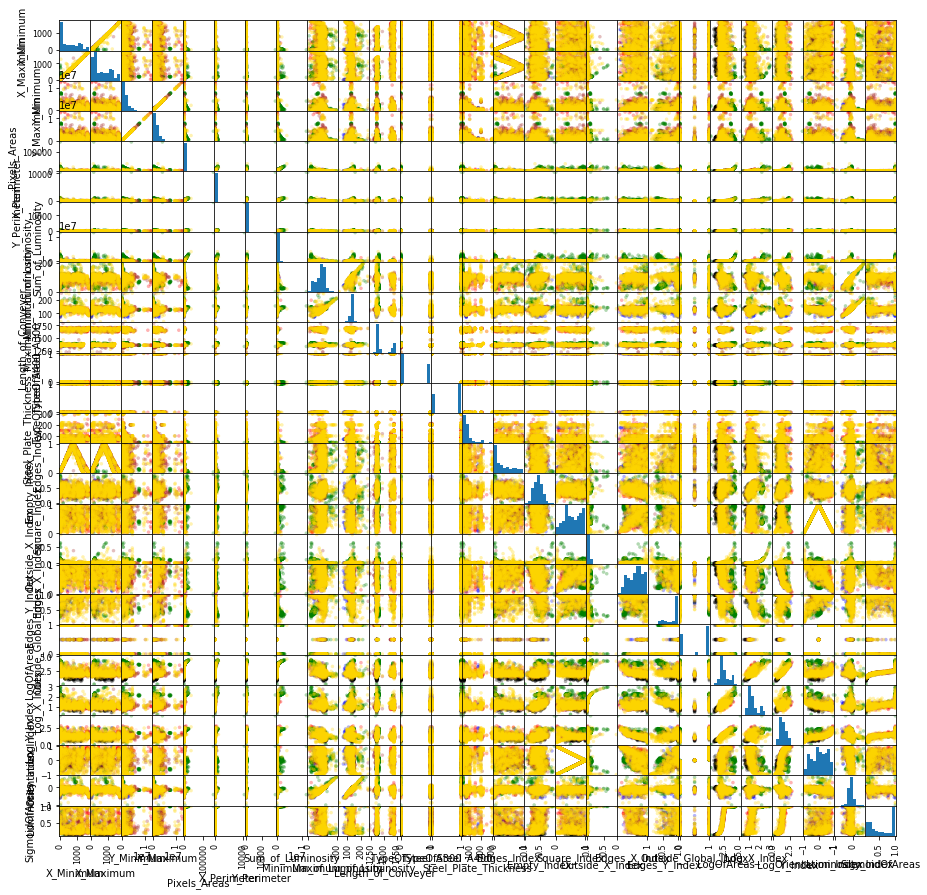

In [22]:
## Coloring the Outcomes
color_code = {'Pastry':'Red', 'Z_Scratch':'Blue', 'K_Scatch':'Green', 'Stains':'Black', 'Dirtiness':'Pink', 'Bumps':'Brown', 'Other_Faults':'Gold'}
color_list = [color_code.get(i) for i in df.loc[:,'class']]
pd.plotting.scatter_matrix(df.loc[:, df.columns != 'class'],
                                       c=color_list,
                                       figsize= [15,15],
                                       diagonal='hist',
                                       alpha=0.3,
                                       s = 50)
plt.show()

### 1.1 Count plot to show the number of Defects belonging to each Defect Type

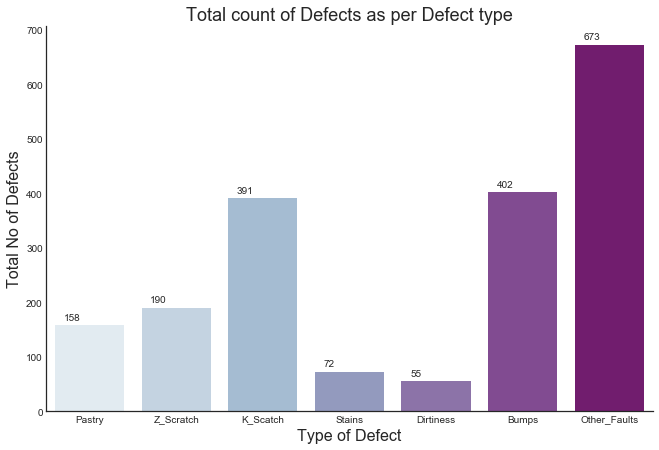

In [9]:

sns.set_style("white")
g = sns.factorplot(x="class", data=df, kind="count",
                   palette="BuPu", size=6, aspect=1.5)
g.ax.xaxis.set_label_text("Type of Defect",fontdict= {'size':16})
g.ax.yaxis.set_label_text("Total No of Defects", fontdict= {'size':16})
g.ax.set_title("Total count of Defects as per Defect type",fontdict= {'size':18})
# to get the counts on the top heads of the bar
for p in g.ax.patches:
    g.ax.annotate((p.get_height()), (p.get_x()+0.1, p.get_height()+10))

We can expect the model to be biased towards 'Other_Faults','Bumps' and 'K_Scratch' as they are high in proportion.

In [7]:
## Only Non-categorical columns
df.describe().columns

Index(['X_Minimum', 'X_Maximum', 'Y_Minimum', 'Y_Maximum', 'Pixels_Areas',
       'X_Perimeter', 'Y_Perimeter', 'Sum_of_Luminosity',
       'Minimum_of_Luminosity', 'Maximum_of_Luminosity', 'Length_of_Conveyer',
       'TypeOfSteel_A300', 'TypeOfSteel_A400', 'Steel_Plate_Thickness',
       'Edges_Index', 'Empty_Index', 'Square_Index', 'Outside_X_Index',
       'Edges_X_Index', 'Edges_Y_Index', 'Outside_Global_Index', 'LogOfAreas',
       'Log_X_Index', 'Log_Y_Index', 'Orientation_Index', 'Luminosity_Index',
       'SigmoidOfAreas'],
      dtype='object')

### 1.2 Visual analysis of the correlation between the Factors

In [8]:
corr = df[['X_Minimum', 'X_Maximum', 'Y_Minimum', 'Y_Maximum', 'Pixels_Areas',
       'X_Perimeter', 'Y_Perimeter', 'Sum_of_Luminosity',
       'Minimum_of_Luminosity', 'Maximum_of_Luminosity', 'Length_of_Conveyer',
       'TypeOfSteel_A300', 'TypeOfSteel_A400', 'Steel_Plate_Thickness',
       'Edges_Index', 'Empty_Index', 'Square_Index', 'Outside_X_Index',
       'Edges_X_Index', 'Edges_Y_Index', 'Outside_Global_Index', 'LogOfAreas',
       'Log_X_Index', 'Log_Y_Index', 'Orientation_Index', 'Luminosity_Index',
       'SigmoidOfAreas']].corr()

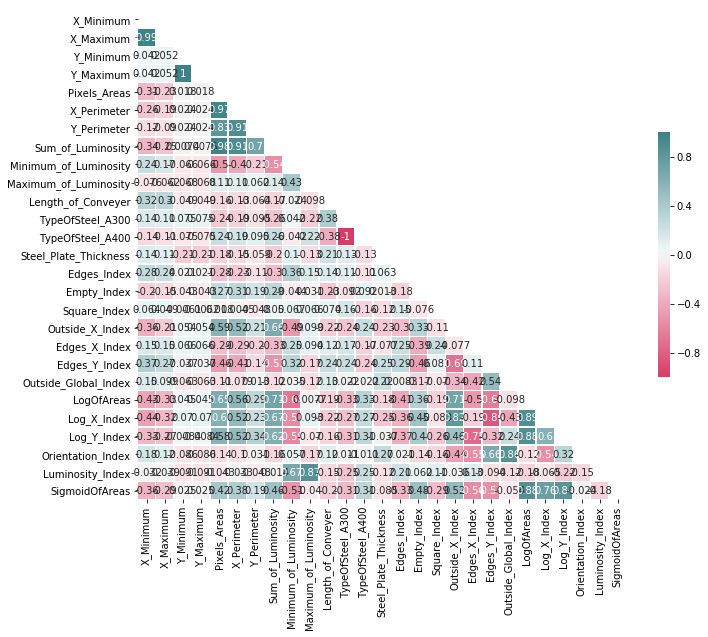

In [24]:
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(1,200, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, vmin =-1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot  = True)


### 1.3 Correlation Matrix

In [11]:
display(df.corr())

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas
X_Minimum,1.000000,0.988314,0.041821,0.041807,-0.307322,-0.258937,-0.118757,-0.339045,0.237637,-0.075554,...,-0.361160,0.154778,0.367907,0.147282,-0.428553,-0.437944,-0.326851,0.178585,-0.031578,-0.355251
X_Maximum,0.988314,1.000000,0.052147,0.052135,-0.225399,-0.186326,-0.090138,-0.247052,0.168649,-0.062392,...,-0.214930,0.149259,0.271915,0.099253,-0.332169,-0.324012,-0.265990,0.115019,-0.038996,-0.286736
Y_Minimum,0.041821,0.052147,1.000000,1.000000,0.017670,0.023843,0.024150,0.007362,-0.065703,-0.067785,...,0.054165,0.066085,-0.036543,-0.062911,0.044952,0.070406,-0.008442,-0.086497,-0.090654,0.025257
Y_Maximum,0.041807,0.052135,1.000000,1.000000,0.017840,0.024038,0.024380,0.007499,-0.065733,-0.067776,...,0.054185,0.066051,-0.036549,-0.062901,0.044994,0.070432,-0.008382,-0.086480,-0.090666,0.025284
Pixels_Areas,-0.307322,-0.225399,0.017670,0.017840,1.000000,0.966644,0.827199,0.978952,-0.497204,0.110063,...,0.588606,-0.294673,-0.463571,-0.109655,0.650234,0.603072,0.578342,-0.137604,-0.043449,0.422947
X_Perimeter,-0.258937,-0.186326,0.023843,0.024038,0.966644,1.000000,0.912436,0.912956,-0.400427,0.111363,...,0.517098,-0.293039,-0.412100,-0.079106,0.563036,0.524716,0.523472,-0.101731,-0.032617,0.380605
Y_Perimeter,-0.118757,-0.090138,0.024150,0.024380,0.827199,0.912436,1.000000,0.704876,-0.213758,0.061809,...,0.209160,-0.195162,-0.136723,0.013438,0.294040,0.228485,0.344378,0.031381,-0.047778,0.191772
Sum_of_Luminosity,-0.339045,-0.247052,0.007362,0.007499,0.978952,0.912956,0.704876,1.000000,-0.540566,0.136515,...,0.658339,-0.327728,-0.529745,-0.121090,0.712128,0.667736,0.618795,-0.158483,-0.014067,0.464248
Minimum_of_Luminosity,0.237637,0.168649,-0.065703,-0.065733,-0.497204,-0.400427,-0.213758,-0.540566,1.000000,0.429605,...,-0.487574,0.252256,0.316610,0.035462,-0.678762,-0.567655,-0.588208,0.057123,0.669534,-0.514797
Maximum_of_Luminosity,-0.075554,-0.062392,-0.067785,-0.067776,0.110063,0.111363,0.061809,0.136515,0.429605,1.000000,...,0.099300,0.093522,-0.167441,-0.124039,0.007672,0.092823,-0.069522,-0.169747,0.870160,-0.039651


# 2. Model Development and Classification

## 2.1 Data Preparation

In [9]:
x = df[['X_Minimum', 'X_Maximum', 'Y_Minimum', 'Y_Maximum', 'Pixels_Areas',
       'X_Perimeter', 'Y_Perimeter', 'Sum_of_Luminosity',
       'Minimum_of_Luminosity', 'Maximum_of_Luminosity', 'Length_of_Conveyer',
       'TypeOfSteel_A300', 'TypeOfSteel_A400', 'Steel_Plate_Thickness',
       'Edges_Index', 'Empty_Index', 'Square_Index', 'Outside_X_Index',
       'Edges_X_Index', 'Edges_Y_Index', 'Outside_Global_Index', 'LogOfAreas',
       'Log_X_Index', 'Log_Y_Index', 'Orientation_Index', 'Luminosity_Index',
       'SigmoidOfAreas']]
y = df['class']

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state =1, stratify = y)

In [11]:
## Normalization

x_train = x_train.apply(zscore)
x_test = x_test.apply(zscore)

In [12]:
x_train.describe()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas
count,1.552000e+03,1.552000e+03,1.552000e+03,1.552000e+03,1.552000e+03,1.552000e+03,1.552000e+03,1.552000e+03,1.552000e+03,1.552000e+03,...,1.552000e+03,1.552000e+03,1.552000e+03,1.552000e+03,1.552000e+03,1.552000e+03,1.552000e+03,1.552000e+03,1.552000e+03,1.552000e+03
mean,-5.880176e-17,-1.716840e-17,4.864379e-17,7.332336e-17,-1.355588e-17,-3.038449e-17,5.356182e-18,1.466467e-18,1.442145e-16,-3.983068e-16,...,-1.303367e-16,-5.708492e-17,-1.730431e-16,1.251862e-16,5.227777e-16,-3.436183e-16,3.662591e-17,1.101639e-17,1.176035e-16,5.207747e-17
std,1.000322e+00,1.000322e+00,1.000322e+00,1.000322e+00,1.000322e+00,1.000322e+00,1.000322e+00,1.000322e+00,1.000322e+00,1.000322e+00,...,1.000322e+00,1.000322e+00,1.000322e+00,1.000322e+00,1.000322e+00,1.000322e+00,1.000322e+00,1.000322e+00,1.000322e+00,1.000322e+00
min,-1.088906e+00,-1.224704e+00,-9.311520e-01,-9.311682e-01,-3.507202e-01,-3.435531e-01,-1.763080e-01,-3.919739e-01,-2.647958e+00,-5.026234e+00,...,-5.669336e-01,-2.501633e+00,-3.206979e+00,-1.160003e+00,-2.763171e+00,-2.150918e+00,-3.061040e+00,-2.094173e+00,-5.895129e+00,-1.365812e+00
25%,-9.919739e-01,-8.471459e-01,-6.741165e-01,-6.740999e-01,-3.358565e-01,-3.031699e-01,-1.509437e-01,-3.748848e-01,-6.587325e-01,-3.379156e-01,...,-4.770644e-01,-7.740283e-01,-9.477897e-01,-1.160003e+00,-7.185383e-01,-7.057120e-01,-6.920435e-01,-8.744709e-01,-4.251109e-01,-1.000863e+00
50%,-2.988334e-01,-3.042782e-01,-2.387872e-01,-2.388073e-01,-3.198918e-01,-2.658932e-01,-1.255794e-01,-3.562236e-01,1.603605e-01,-1.762494e-01,...,-4.136274e-01,1.035380e-01,5.731027e-01,9.022246e-01,-3.251793e-01,-3.416195e-01,-1.586240e-01,3.297919e-02,-1.160030e-02,-2.548046e-01
75%,9.262181e-01,9.064596e-01,2.916699e-01,2.916719e-01,-2.046981e-01,-9.504134e-02,-2.985317e-03,-2.425218e-01,6.908207e-01,5.243039e-01,...,-1.757383e-01,7.750598e-01,8.076703e-01,9.022246e-01,5.232973e-01,3.931818e-01,7.418231e-01,8.580598e-01,4.455360e-01,1.222326e+00
max,2.233102e+00,2.259037e+00,6.289125e+00,6.289059e+00,2.766149e+01,3.210898e+01,3.818931e+01,2.156229e+01,3.686361e+00,6.613729e+00,...,1.034777e+01,1.609248e+00,8.076703e-01,9.022246e-01,3.406614e+00,3.302201e+00,6.287410e+00,1.831643e+00,5.247249e+00,1.222914e+00


##### The below function 'modelEval' is created for the following purpose:
         1. To fit the model
         2. To find the predicted class.
         2. To showcase the model's confusion matrix.
         3. To Evaluate the model's accuracy
         4. To Report models' Precision, recall and F-1 Score.

In [13]:
def modelEval(model):
    
    model.fit(x_train, y_train)
    print("\nBest Parameters :",model.best_params_)
    predicted = model.predict(x_test)
    cMatrix = confusion_matrix(y_test, predicted)
    print("\n",cMatrix)
    print("\nModel Accuracy :", round(model.score(x_test,y_test)*100,3))
    print(metrics.classification_report(y_test, predicted))
    

## 2.2 Model Development

### 2.2.1 Logistic Regression

For Logistic Regression, an experimentation on HyperParameters 'penalty', 'C', 'tol' and 'solver' was performed. The following parameters attained the best accuracy. Results in the table below:

* **penalty** : l1(Outperforms l2)
* **C** : 0.9( Best amongst 0.01,0.1,0.5,0.9,1,5,10)
* **tol** : 1e-2(Best amongst 1e-4, 1e-3, 1e-2, 1e-1, 1, 1e2)
* **solver** : liblinear is the only algorithm that can be used with both 'l1' and 'l2'


In [16]:
lm = LogisticRegression()
params = { 'penalty': ['l1','l2'],'C': [0.01,0.1,0.5,0.9,1,5,10], 'tol': [ 1e-4, 1e-3, 1e-2, 1e-1, 1, 1e2 ], 'solver': ['liblinear']}
GSLR = GridSearchCV(lm, params, cv=10)

In [17]:
modelEval(GSLR)


Best Parameters : {'C': 0.5, 'penalty': 'l1', 'solver': 'liblinear', 'tol': 0.01}

 [[50  0  0 28  1  0  2]
 [ 0  5  0  6  0  0  0]
 [ 3  0 69  4  2  0  0]
 [31  0  8 86  6  0  4]
 [ 2  0  0 17 12  0  1]
 [ 0  0  0  0  0 14  0]
 [ 2  0  0  7  0  0 29]]

Model Accuracy : 68.123
              precision    recall  f1-score   support

       Bumps       0.57      0.62      0.59        81
   Dirtiness       1.00      0.45      0.62        11
    K_Scatch       0.90      0.88      0.89        78
Other_Faults       0.58      0.64      0.61       135
      Pastry       0.57      0.38      0.45        32
      Stains       1.00      1.00      1.00        14
   Z_Scratch       0.81      0.76      0.78        38

 avg / total       0.69      0.68      0.68       389



### 2.2.2 KNN

For KNN, an experimentation on parameters 'k', 'weights' and 'algorithm' was performed.The following parameters attained the best accuracy. Results in the table below:

* **k** : 5(Best amongst 1 to 59)
* **weights** : distance( Best amongst uniform and distance)
* **algorithm** : auto(Best amongst 'auto', 'ball_tree', 'kd_tree', 'brute')


In [18]:
knn = KNeighborsClassifier()
k = np.arange(1, 60)
parameters = { 'n_neighbors': k, 'weights': ['uniform', 'distance'], 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'] }
GSKnn = GridSearchCV(knn, parameters, cv=10)

In [19]:
modelEval(GSKnn)


Best Parameters : {'algorithm': 'auto', 'n_neighbors': 5, 'weights': 'distance'}

 [[50  1  0 23  2  0  5]
 [ 0 10  0  1  0  0  0]
 [ 2  0 72  4  0  0  0]
 [24  1  6 87  8  1  8]
 [ 4  0  0 14 12  0  2]
 [ 0  0  0  0  0 14  0]
 [ 0  0  0  4  1  0 33]]

Model Accuracy : 71.465
              precision    recall  f1-score   support

       Bumps       0.62      0.62      0.62        81
   Dirtiness       0.83      0.91      0.87        11
    K_Scatch       0.92      0.92      0.92        78
Other_Faults       0.65      0.64      0.65       135
      Pastry       0.52      0.38      0.44        32
      Stains       0.93      1.00      0.97        14
   Z_Scratch       0.69      0.87      0.77        38

 avg / total       0.71      0.71      0.71       389



### 2.2.3 Naïve Bayes

In [20]:
nb = GaussianNB()

In [21]:
nb.fit(x_train, y_train)

GaussianNB(priors=None)

In [22]:
y_test_naive = nb.predict(x_test)

In [23]:
print(confusion_matrix(y_test, y_test_naive))
print("\n\n The Accuracy is :",round(nb.score(x_test, y_test)*100,2))
print(metrics.classification_report(y_test, y_test_naive))

[[ 7  1  0 39 28  0  6]
 [ 0  2  0  1  8  0  0]
 [ 0  0  0 77  1  0  0]
 [10  3  0 75 40  0  7]
 [ 0  3  0  3 25  0  1]
 [ 0  0  0 14  0  0  0]
 [ 0  1  0  5  3  0 29]]


 The Accuracy is : 35.48
              precision    recall  f1-score   support

       Bumps       0.41      0.09      0.14        81
   Dirtiness       0.20      0.18      0.19        11
    K_Scatch       0.00      0.00      0.00        78
Other_Faults       0.35      0.56      0.43       135
      Pastry       0.24      0.78      0.36        32
      Stains       0.00      0.00      0.00        14
   Z_Scratch       0.67      0.76      0.72        38

 avg / total       0.30      0.35      0.28       389



C:\Users\IQbal\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### 2.2.4 Decision Trees

For Decision Trees, an experimentation on parameters 'splitting criteria', 'minimum samples required to split', 'max depth of the tree', 'minimum samples required at the leaf level' and the 'maximum features' to consider when looking for the best split. The following values of the parameters attained the best accuracy during classification. Results in the table below.

*	**Splitting criteria:** Gini Index (Using Gini Index marginally outperformed Entropy with a higher accuracy.)
*	**Min samples required to split:** 1% (Best amongst 1%, 10% and 5%.)
*	**Max Depth:** None
*	**Min samples required at leaf:**  0.1 % (Best amongst 1%, 5% and 0.1%.)
*	**Max features:** None (Performs better than 'auto', 'log2' and 'sqrt'.)


In [24]:
dt = DecisionTreeClassifier()
parameters = { 'criterion': ['gini', 'entropy'],'min_samples_split':[0.01,0.05,0.1] ,'max_depth': [None, 2,3,4], 'min_samples_leaf': [0.001,0.01,0.05], 'max_features': [None, 'auto','sqrt', 'log2' ]  }
GSDT = GridSearchCV(dt, parameters, cv=10)

In [25]:
modelEval(GSDT)


Best Parameters : {'criterion': 'gini', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 0.001, 'min_samples_split': 0.01}

 [[27  0  0 51  1  0  2]
 [ 2  4  0  5  0  0  0]
 [ 2  0 69  4  3  0  0]
 [19  0  4 93 15  0  4]
 [ 3  2  0 20  6  0  1]
 [ 0  0  0  0  0 14  0]
 [ 0  1  1  6  0  0 30]]

Model Accuracy : 62.468
              precision    recall  f1-score   support

       Bumps       0.51      0.33      0.40        81
   Dirtiness       0.57      0.36      0.44        11
    K_Scatch       0.93      0.88      0.91        78
Other_Faults       0.52      0.69      0.59       135
      Pastry       0.24      0.19      0.21        32
      Stains       1.00      1.00      1.00        14
   Z_Scratch       0.81      0.79      0.80        38

 avg / total       0.62      0.62      0.62       389



### 2.2.5 Random Forest

For the random forests classifier, I experimented with the number of trees, splitting criteria, minimum samples required to split, max depth of the tree, minimum samples required at the leaf level and the maximum features to consider when looking for the best split. The following values of the parameters attained the best accuracy during classification. Results in the table below.

*	**Num estimators:** 300 (Best amongst 100,200,300)
*	**Splitting criteria:** Gini Index (Using Gini Index marginally outperformed Entropy with a higher accuracy.)
*	**Min samples required to split:** 1% (Best amongst 1%, 10% and 5%.)
*	**Min samples required at leaf:**  0.1 % (Best amongst 1%, 5% and 0.1%.)
*	**Max features:** None (Performs better than 'auto', 'log2' and 'sqrt'.)


In [26]:
rf = RandomForestClassifier()
parameters = { 'n_estimators': [100,200,300],'criterion': ['gini', 'entropy'],'min_samples_leaf':[0.001,0.01,0.05], 'min_samples_split': [0.01,0.05,0.1],'max_features': [None, 'auto','sqrt', 'log2' ]  }
GSRF = GridSearchCV(rf, parameters, cv=10)

In [27]:
modelEval(GSRF)


Best Parameters : {'criterion': 'entropy', 'max_features': None, 'min_samples_leaf': 0.001, 'min_samples_split': 0.01, 'n_estimators': 300}

 [[19  1  0 41  2 14  4]
 [ 0  4  0  1  0  6  0]
 [ 1  0 72  4  0  1  0]
 [ 4  0  2 96  3 27  3]
 [ 3  0  0 18 10  1  0]
 [ 0  0  0  0  0 14  0]
 [ 0  0  0  4  0  4 30]]

Model Accuracy : 62.982
              precision    recall  f1-score   support

       Bumps       0.70      0.23      0.35        81
   Dirtiness       0.80      0.36      0.50        11
    K_Scatch       0.97      0.92      0.95        78
Other_Faults       0.59      0.71      0.64       135
      Pastry       0.67      0.31      0.43        32
      Stains       0.21      1.00      0.35        14
   Z_Scratch       0.81      0.79      0.80        38

 avg / total       0.71      0.63      0.63       389

